I'm going to make an undirected graph that we'll use to demonstrate network measures. 

In [1]:
import networkx as nx

G = nx.Graph()

G.add_edges_from(
    [
        ("a", "b"),
        ("a", "d"),
        ("a", "f"),
        ("b", "g"),
        ("b", "d"),
        ("b", "a"),
        ("b", "e"),
        ("c", "d"),
        ("c", "h"),
        ("d", "a"),
        ("d", "b"),
        ("d", "c"),
        ("d", "e"),
        ("d", "f"),
        ("d", "g"),
        ("e", "b"),
        ("e", "d"),
        ("e", "g"),
        ("f", "a"),
        ("f", "d"),
        ("f", "g"),
        ("f", "h"),
        ("g", "e"),
        ("g", "b"),
        ("g", "f"),
        ("g", "h"),
        ("h", "g"),
        ("h", "f"),
        ("h", "c"),
        ("h", "r"),
        ("h", "i"),
        ("i", "h"),
        ("i", "p"),
        ("i", "j"),
        ("i", "n"),
        ("j", "p"),
        ("j", "m"),
        ("j", "l"),
        ("j", "k"),
        ("j", "o"),
        ("j", "n"),
        ("j", "i"),
        ("k", "j"),
        ("k", "l"),
        ("k", "p"),
        ("l", "m"),
        ("l", "k"),
        ("l", "j"),
        ("m", "l"),
        ("m", "j"),
        ("m", "q"),
        ("n", "i"),
        ("n", "j"),
        ("n", "o"),
        ("o", "n"),
        ("o", "j"),
        ("p", "i"),
        ("p", "j"),
        ("p", "k"),
        ("q", "m"),
        ("q", "s"),
        ("r", "h"),
        ("s", "q")   
    ]
)

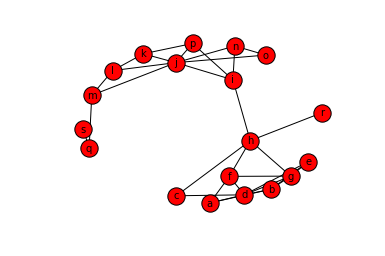

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, iterations=100)
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis("off")
plt.show()

The degree of a node is simply a count of the number of edges a node has. Using the ``degree`` method on a graph, you can discover the degree of any given node. 

In [3]:
G.degree("k")

3

When dealing withi a directed network, we must distinguish edges that originate **from** a node from edges that point **to** a node. The **outdegree** of a node is a count of the number of edges originating from a node, and the **indegree** is the number of edges that point to a node. 

I'm going to use a networkx function to generate a random directed graph.

In [4]:
DG = nx.erdos_renyi_graph(100, 0.4, directed=True)

In [5]:
# indegree of node 37
print(DG.in_degree(37))
# outdegree of node 37
print(DG.out_degree(37))

45
44


Note that it's totally feasible for a node to have very different indegrees and outdegrees.

If we're dealing with a **weighted** network, each of the edges has a number corresponding to that edge's weight. In this scenario, the degree of a node is the **sum of the weights of the edges that node is connected to**. 

I'll generate an undirected, weighted graph. 

In [6]:
import numpy as np
WG = nx.erdos_renyi_graph(100, 0.4)
for edge in WG.edges():
    WG.edge[edge[0]][edge[1]]['weight'] = np.random.randint(0, 10)

We can get the weighted degree of a node by specifying the **name of the edge attribute that contains the weight**. In our case, the name of this attribute is ``weight``. 

In [7]:
# The edges of node 37
WG.edge[37]

{1: {'weight': 6},
 3: {'weight': 1},
 6: {'weight': 3},
 7: {'weight': 8},
 8: {'weight': 5},
 11: {'weight': 8},
 12: {'weight': 1},
 13: {'weight': 6},
 14: {'weight': 0},
 18: {'weight': 2},
 22: {'weight': 6},
 24: {'weight': 0},
 25: {'weight': 0},
 27: {'weight': 7},
 32: {'weight': 7},
 34: {'weight': 8},
 35: {'weight': 0},
 36: {'weight': 8},
 38: {'weight': 9},
 39: {'weight': 8},
 47: {'weight': 0},
 48: {'weight': 2},
 50: {'weight': 0},
 51: {'weight': 5},
 54: {'weight': 6},
 55: {'weight': 4},
 56: {'weight': 1},
 57: {'weight': 9},
 64: {'weight': 8},
 67: {'weight': 2},
 68: {'weight': 6},
 70: {'weight': 7},
 71: {'weight': 6},
 72: {'weight': 4},
 79: {'weight': 8},
 84: {'weight': 3},
 85: {'weight': 9},
 86: {'weight': 8},
 89: {'weight': 3},
 90: {'weight': 1},
 93: {'weight': 0},
 94: {'weight': 0},
 95: {'weight': 0},
 96: {'weight': 4},
 97: {'weight': 2},
 98: {'weight': 1}}

What is the degree of node 37?

In [8]:
WG.degree(37, weight="weight") # designate the name of the edge attribute with the parameter weight

192

# Degree Centrality

One way we can quantify the importance of a node is to simply take into account how many edges they have. A node with a lot of edges is important, a node with fewer edges is less important. 

The networkx function ``degree_centrality`` calculates the *normalized degree* for every node in a graph. It is normalized by the highest number of connections a node may possibly have: if the number of nodes in a network is $n$, then degree centrality is normalized by $n-1$.

In [9]:
nx.degree_centrality(G)

{'a': 0.16666666666666666,
 'b': 0.2222222222222222,
 'c': 0.1111111111111111,
 'd': 0.3333333333333333,
 'e': 0.16666666666666666,
 'f': 0.2222222222222222,
 'g': 0.2777777777777778,
 'h': 0.2777777777777778,
 'i': 0.2222222222222222,
 'j': 0.38888888888888884,
 'k': 0.16666666666666666,
 'l': 0.16666666666666666,
 'm': 0.16666666666666666,
 'n': 0.16666666666666666,
 'o': 0.1111111111111111,
 'p': 0.16666666666666666,
 'q': 0.1111111111111111,
 'r': 0.05555555555555555,
 's': 0.05555555555555555}

Here, we can see that the "most important" node, in terms of Degree Centrality, is node "j", which has a normalized degree centrality of 0.39. 

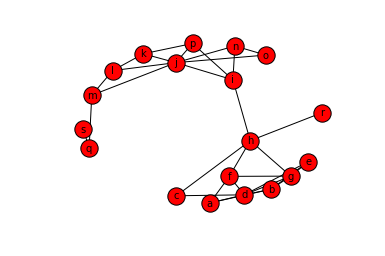

In [10]:
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis("off")
plt.show()

In [11]:
G.degree("j")

7

We can see in the graph visualization that node j is indeed connected to many other nodes, and it has a degree of 7, the highest in the graph. 

The *meaning* of degree centrality is highly dependent on what your network represents, and what you consider to be an indication of *importance*. Let's look at a few examples

* A Facebook Friend Network: nodes are Facebook users, and a link exists between two users if they are Facebook friends. Degree centrality represents *how popular* a person is. The higher the centrality, the more friends the user has. 
* A Network of intervenous drug users: Let's say you're a health official and you've conducted some anthropological research on IV drug users in your city. Nodes are IV drug users, and an edge exists if two people have reported they share needles. The person with the highest degree centrality is the person who shares needles with the most people; a potential candidate for an intervention like a clean needle program.
* Hashtag Cooccurrence: A node is a hashtag, and an edge exists between two hashtags if they have been used together in the same tweet. The hashtag with the highest degree centrality is a *versatile* hashtag; it can be used in many situations and therefore is used with many different other hashtags.

# Other Measures of Centrality

## Closeness Centrality

Degree centrality may strike you as important in only *some* situations. Is the person with the most links *truly* the most important person in the network? It depends on your research interest: not necessarily. 

You've probably heard of the game "Six Degrees of Kevin Bacon". In this game, someone names an actor - any actor. Then, starting from that actor, the players try to name someone that this actor has acted with in a movie: let's call that person actor B. Then, you find a person who has acted with actor B in a movie: actor C. You do this until you finally arrive at Kevin Bacon. The goal is to take less than six steps (degrees) to find Kevin Bacon. 

In this game, importance is not defined by degree centrality: the number of people a person has acted with. Instead, there is another measure, called **closeness centrality**, which is a measure of how close a node is to **all other nodes in the network**.

Closeness centrality is calculated as such: for the selected node, **find the length of the shortest path between it and all other nodes**. Then, take the average of those lengths. This average is normalized by dividing the **longest possible path in the network** by this average. For a given network with $n$ nodes, the longest possible path is $n-1$ (a hypothetical scenario where if you had to get from node A to B, you have to cross through *all other nodes* in the network). The reason for this normalization is to get the scale right: a higher number means the node is **closer** to other nodes, a lower number means a node is **further away**.

In [12]:
nx.closeness_centrality(G)

{'a': 0.2903225806451613,
 'b': 0.29508196721311475,
 'c': 0.34615384615384615,
 'd': 0.3050847457627119,
 'e': 0.2903225806451613,
 'f': 0.36,
 'g': 0.3673469387755102,
 'h': 0.45,
 'i': 0.46153846153846156,
 'j': 0.42857142857142855,
 'k': 0.3157894736842105,
 'l': 0.32727272727272727,
 'm': 0.3333333333333333,
 'n': 0.375,
 'o': 0.3103448275862069,
 'p': 0.375,
 'q': 0.2608695652173913,
 'r': 0.3157894736842105,
 's': 0.20930232558139536}

Here, we see node i is the degree with the highest closeness centrality.

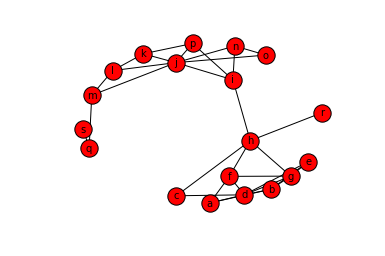

In [13]:
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis("off")
plt.show()

It doesn't have the highest degree, but it is closer to all the other nodes on average than the node with the highest degree centrality, j.

* A Facebook friend network: the person with the highest closeness centrality is the person who is a short distance from *all* the people in the network. If the person with the highest degree centrality shares a post, it will be exposed to *more people*, while if the person with the highest closeness centrality shares a post, it has a higher potential to *eventually be seen by everyone in the network*.
* An IV user network: if this person contracts a disease from IV drug usage, there's more of a risk that everyone in the network will also contract the disease in a shorter period of time. 
* A hashtag cooccurence network: the hashtag with the highest closeness centrality is not necessarily popular, but it is probably *very general and non-specific*. It has the shortest distance to hashtags about politics, fashion, food, cities, etc., so it must have a very broad meaning.

**AN IMPORTANT NOTE ON RUNTIME:** closeness centrality calculation **scales very poorly with network size**. To get the closeness centrality of *every node* in a network, you need to calculate $\frac{n \cdot (n-1)}{2}$ distances. Furthermore, you need to find the *shortest* distance, and the larger the network, the more possible paths there are between two given nodes. If your graph has 100,000 nodes, it needs to calculate 4,999,950,000 distances, and for each distance, it may have to explore a very large number of paths. *If you have a very large network,* using ``closeness_centrality`` may take a very long time. You may have to settle for calculating the closeness centrality of a subset of nodes.

## Betweenness Centrality

In degree centrality, emphasis is placed on how many links a node has. In closeness centrality, emphasis is on how close a node is to all other nodes in the network. For betweenness centrality, what makes a node important is *how in-between* it is.

The first step in calculating betweenness centrality is taking *every pair of nodes* and finding the shortest path between them. Once this is accomplished, to find the betweenness centrality of a given node, calculate *the fraction of all these shotest paths that include this node*. 

Intuitively, a node $X$ has a high betweenness centrality if when traveling from one node to another node in a network, one often has to pass through node $X$. We can conceptualize nodes with high betweenness centrality as *bridge nodes*. To cross from one area of the network to another, you have to go through these nodes. 

In [14]:
nx.betweenness_centrality(G)

{'a': 0.0021786492374727667,
 'b': 0.005446623093681917,
 'c': 0.026143790849673196,
 'd': 0.03703703703703704,
 'e': 0.0,
 'f': 0.10675381263616555,
 'g': 0.18845315904139437,
 'h': 0.5751633986928105,
 'i': 0.5326797385620915,
 'j': 0.434640522875817,
 'k': 0.0032679738562091504,
 'l': 0.00980392156862745,
 'm': 0.20915032679738563,
 'n': 0.032679738562091505,
 'o': 0.0,
 'p': 0.032679738562091505,
 'q': 0.11111111111111112,
 'r': 0.0,
 's': 0.0}

The node with the highest betweenness centrality is h. 

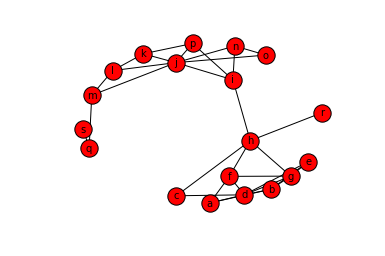

In [15]:
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis("off")
plt.show()

Recall that the node with the highest **closeness centrality** is node i. It is, on average, closer to all other nodes in the network. However, h has a higher **betweenness centrality**. In particular, we can see that in order to reach node r from *any other node*, one most pass through h. Node h is the "gate keeper," so to speak. 

Note, also, that node i also has a high betweenness centrality. This is obvious for both h and i, as they are the only nodes that link the community centered on node j to the community centered on node d. If one wants to travel from one community to the other, one *must* travel through nodes i and h. There is no alternative.

Node j, too, also has a high betweenness centrality. Nodes k, l, m, o, and n most first pass through j before they can get to node i.

Finally, node m has a high betweenness centrality, despite not having a high degree centrality or closeness centrality. Note that the only way to get to nodes q and s are through node m.

* A Facebook friend network: a person with a high betweenness centrality is a person who tends to *link different communities*. Let's say students in the chemistry department tend to know each other well and be Facebook friends - same for students in the art department. There may be a unique student majoring in both chemistry and art, and is friends with people from both departments. For information traveling from a chemistry student to an art student, it will probably go through the double major student. This student will have a high betweenness centrality.
* An IV drug user network: you might notice in your IV data that people in neighborhood A tend to share needles among themselves, and people in neighbor B tend to share needles among themselves. You might notice an individual with high betweenness centrality who shares needles with a person in neighborhood B and neighborhood A. This person may not have a high degree centrality, but they will have a high betweenness centrality. If there is a high prevalence of disease in neighborhood A, but not in B, you will have to focus on this person who goes to both.
* A Hashtag Cooccurrence network: a hashtag with high betweenness centrality will be one that tends to occur alongside unexpected combinations of hashtags. Politics hashtags tend to cluster together, and food hashtags tend to cluster together. Let's say you identify a hashtag #blockLaw1234 that tends to occur with *both* politics and food hashtags. It will have a high betweenness centrality. Maybe this is a law about putting tariffs on imported foodstuffs. It plays a unique role in the network.

**AN IMPORTANT NOTE ON RUNTIME:** calculating betweenness centrality has the same problem as closeness centrality. It scales poorly with network size. Fortunately, in networkx's implementation, there is an additional parameter you can pass called ``k``, that takes an integer. If you pass ``k`` to ``betweenness_centrality``, networkx will attempt to **estimate** the betweenness centrality from ``k`` samples, instead of all them. This will be an estimation; the higher ``k`` is, the more accurate the estimation, but the more time it will take.

## Eigenvector Centrality

Degree Centrality asserts that a node is more important - more central - in a network if it has a high degree. However, this type of assertion does not hold in a number of scenarios.

Take academic research, for example. A paper may be cited thousands of times, but if it is cited by *unimportant papers* then these citations don't count for much. However, a different paper may be cited only a few times, but if it is cited by *important papers by important authors*, then those citations should be considered as valuable.

In other words, perhaps we shouldn't consider all links pointing to a node equal. Some links should be considered more important than others.

There's a lot of math behind Eigenvector centrality, but the basic idea is that **if a node receives a link from another node that itself has many links, that link should be more important**.

The most intuitive way to illustrate this is to talk a bit about Google's PageRank algorithm, which is used to display and rank Google Search results. It's a variation of Eigenvector centrality.

If your webpage A receives 1000 incoming links from minor cites that no one visits, but page B receives 5 incoming links from prestigious web pages like the BBC and the New York Times, which page should be ranked higher? Page B, obviously, because the links it receives are more prestigious and reliable.

Here is an illustration of PageRank at work.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/PageRanks-Example.svg">

Note that node B has an indegree of 6, and so does node E. However, PageRank gives a higher score to B because it receives incoming links from higher rated nodes, while node E receives incoming links mostly from minor nodes that themselves have no incoming links.

Note also, that node C has an indegree of 1, but because that incoming node is from an extremely important node, its PageRank is quite high.

Here's how we calculate Eigenvector Centrality using NetworkX:

In [16]:
nx.eigenvector_centrality(G)

{'a': 0.28618176306341425,
 'b': 0.3599629401112342,
 'c': 0.18140671187622603,
 'd': 0.46467020048465585,
 'e': 0.30408361894632513,
 'f': 0.35484344107827936,
 'g': 0.4286246181260994,
 'h': 0.28298333308967794,
 'i': 0.1327556499891029,
 'j': 0.11722740340935621,
 'k': 0.059696930852567005,
 'l': 0.05366165312911118,
 'm': 0.0442318381956,
 'n': 0.0717837171852441,
 'o': 0.04586179444984825,
 'p': 0.07514071770955315,
 'q': 0.011403927595643626,
 'r': 0.06866167801486517,
 's': 0.002767084867422452}

Node d has the highest eigenvector centrality (0.46), followed by node g (0.42) and node b (0.36).

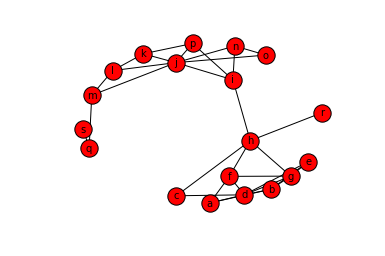

In [17]:
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis("off")
plt.show()

Node d and node j have similar degrees, but node d's eigenvector centrality is much higher. The nodes that "support" node j by linking to it themselves don't have many links, while the nodes that "support" node d have more incoming links, so their "support" counts for more. 

* A Facebook friend network: a user with a high eigenvector centrality is "friends with people who themselves have a lot of friends." Using eigenvector centrality, we can differentiate two different types of "popularity." If someone has a high degree centrality but a low eigenvector centrality, they have a lot of friends, but those friends don't possess a lot of connections themselves.
* An IV drug user network: a user with a high eigenvector centrality is someone who shares needles with other people who share a lot of needles. This are very high-risk individuals. Someone who has a high degree centrality may be at low risk *if* the people they share needles with do not themselves share with many other people.
* A hashtag cooccurrence network: a hashtag with a high eigenvector centrality is a hashtag that is used often with *other* popular hashtags. Such a hashtag may not have a high degree centrality, but in that case the few hashtags it does occur with are popular and widely used. 

# Correlations between centrality types

Sometimes, centralities are *correlated*, in that a node with a high degree centrality may also have a high closeness, betweenness, and eigenvector centrality. Imagine a tightly knit community with one person dominating in the center of the network. This person may have high degree centrality (they have a lot of links), closeness centrality (they are the person closest to everyone else), betweenness centrality (to get from A to B, you have to pass through them) and eigenvector centrality (the links leading to them are from other important people).

But this isn't always the case. This image from the Wikipedia page is illustrative:

<img src="https://upload.wikimedia.org/wikipedia/commons/1/11/6_centrality_measures.png">

A is Betweenness Centrality, B is Closeness Centrality, C is Eigenvector Centrality, and D is Degree centrality. E and F are Harmonic and Katz centrality, respectively, two measures we have not covered. Closeness Centrality (B) is high for nodes that are in the "middle" of the network, while Betweenness Centrality is high for nodes that link different dense regions of the network. Degree centrality (D) highlights the "hubs" of different communities, while Eigenvector Centrality (C) favors the grouping on the lower right, seeing all other parts of the network as not important.

Truly the only way to determine if these measures are correlated is simply to calculate them for the dataset you are working with. 